# Exploratory Data Analysis/Preprocessing on "Big Five" Football leagues for 2017-2020 seasons

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data:

In [2]:
data = pd.read_csv('fut_data_17_to_20.csv')
data.shape

(5240, 82)

There are 5240 observations (players) in the data from three different seasons with 82 variables.

In [3]:
data.head()

,Player,Age,Born,Nation,Pos,Squad,Comp,MP,Starts,Min,...,Miscon,Dispos,Fls,PKwon,PKcon,Recov,AD_Won,AD_Lost,Game,overall
0,Aaron Cresswell,27.0,1989.0,eng ENG,DF,West Ham,Premier League,36,35,3069,...,18.0,17.0,20,0.0,0.0,318.0,37.0,30.0,FIFA 19,74
1,Aaron Hunt,30.0,1986.0,de GER,MF,Hamburger SV,Bundesliga,28,26,2081,...,45.0,42.0,27,0.0,0.0,213.0,22.0,37.0,FIFA 19,76
2,Aaron Lennon,30.0,1987.0,eng ENG,MF,Burnley,Premier League,29,22,1911,...,19.0,33.0,21,2.0,0.0,118.0,3.0,7.0,FIFA 19,77
3,Aaron Mooy,26.0,1990.0,au AUS,MF,Huddersfield,Premier League,36,34,3067,...,37.0,55.0,26,0.0,0.0,456.0,16.0,22.0,FIFA 19,79
4,Aaron Ramsey,26.0,1990.0,wal WAL,MF,Arsenal,Premier League,24,21,1846,...,44.0,30.0,28,1.0,0.0,166.0,5.0,8.0,FIFA 19,82


Just by looking at the head of the data, we can see that some of the variables are related to each other, such as 'Age' and 'Born'. We will deal with this variables later. Let's take a closer look at some of them next:

In [4]:
data.Age.describe()

count    5240.000000
mean       25.015649
std         4.156802
min        15.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        40.000000
Name: Age, dtype: float64

The average age in the data set is 25 years old, with a minimum of 15 and a maximum of 40. Interestingly, 75% of players are 28 or younger, which makes sense as players tend to retire once they are in their 30s.

In [5]:
data.Nation.value_counts()

fr FRA     757
it ITA     546
de GER     544
es ESP     480
eng ENG    456
          ... 
bi BDI       1
ne NIG       1
bm BER       1
li LIE       1
tt TRI       1
Name: Nation, Length: 108, dtype: int64

In [6]:
print(sum(data.Nation.value_counts().head()))
print(len(data))

2783
5240


Unsurprisingly, the majority of the players in the 'Big Five' Leagues (England, France, Italy, Germany and Spain) come from those 5 countries. Let's take a look at the player's Overall Rating in FIFA next: 

In [7]:
data.overall.describe()

count    5240.000000
mean       74.686832
std         5.412108
min        55.000000
25%        72.000000
50%        75.000000
75%        78.000000
max        94.000000
Name: overall, dtype: float64

'overall' is the player's rating in FIFA. Ratings range from 55 to 94 with a mean of around 75.

<AxesSubplot:>

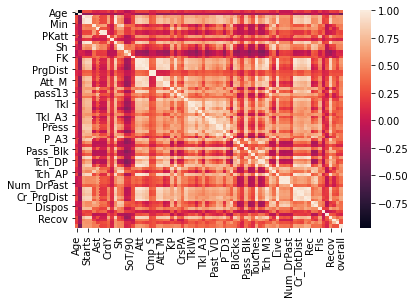

In [8]:
sns.heatmap(data.corr())

Looking at the heatmap above, the cells that are very dark and very light correspond to variables with strong low/high correltation. As mentioned earlier, there are many variables in the data that are directly related to other variables:

In [9]:
data.columns

Index(['Player', 'Age', 'Born', 'Nation', 'Pos', 'Squad', 'Comp', 'MP',
       'Starts', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'CrdY', 'CrdR', '90s',
       'Sh', 'SoT', 'Sh/90', 'SoT/90', 'FK', 'Cmp', 'Att', 'TotDist',
       'PrgDist', 'Cmp_S', 'Att_S', 'Cmp_M', 'Att_M', 'Cmp_L', 'Att_L', 'KP',
       'pass13', 'PPA', 'CrsPA', 'Prog', 'Tkl', 'TklW', 'Tkl_D3', 'Tkl_M3',
       'Tkl_A3', 'Tkl_VD', 'Att_VD', 'Past_VD', 'Press', 'Press_Succ', 'P_D3',
       'P_M3', 'P_A3', 'Blocks', 'Sh_Blk', 'ShSv', 'Pass_Blk', 'Clr', 'Err',
       'Touches', 'Tch_DP', 'Tch_D3', 'Tch_M3', 'Tch_A3', 'Tch_AP', 'Live',
       'Dr_Succ', 'Dr_Att', 'Num_DrPast', 'Megs', 'Carries', 'Cr_TotDist',
       'Cr_PrgDist', 'Targ', 'Rec', 'Miscon', 'Dispos', 'Fls', 'PKwon',
       'PKcon', 'Recov', 'AD_Won', 'AD_Lost', 'Game', 'overall'],
      dtype='object')

Based on the column names above and their descriptions from the data source, these variables have high correlations:
 - 'Age' and 'Born': pretty self explanatory, 'Age' is just current year - 'Born'
 - 'Min' and '90s': 'Min' is total minutes played while '90s' is just 'Min'/90
 - 'Sh' and 'Sh/90': 'Sh' is shots while 'Sh/90' is shots per 90 minutes (length of a game)
 - 'SoT' and 'SoT/90': similar as above, but for Shots on Target
 - 'Cmp' and 'Cmp_S', 'Cmp_M' and 'Cmp_L': 'Cmp' is total passes completed while the other 3 are for Short, Medium and Long completed passes, meaning 'Cmp' is the sum of the other 3
 - 'Att' and 'Att_S', 'Att_M' and 'Att_L': similar as above, but for attempted passes
 - 'Tkl' and 'Tkl_D3', 'Tkl_M3' and 'Tkl_A3': similar as above, but for tackles
 - 'Att_VD' and 'Tkl_VD' and 'Past_VD': 'Att_VD' is the number of times dribbled past plus the number of tackles (sum of other two)
 - 'Press' and 'P_D3', 'P_M3' and 'P_A3': 'Press' is the total number of pressures, and is the sum of the other 3
 - 'Blocks' and 'Sh_Blk' and 'Pass_Blk': 'Blocks' is the sum of the other two, shots blocked and passes blocked
 - 'Touches' and 'Tch_DP', 'Tch_D3', Tch_M3', 'Tch_A3' and 'Tch_AP': 'Touches' is the sum of the other variables

From above, the variables that will be removed are: 'Born', '90s', 'Sh/90', 'SoT/90', 'Cmp', 'Att', 'Tkl', 'Att_VD', 'Press', 'Blocks', and 'Touches'

Let's look at the categorical variables:

In [10]:
data.dtypes[data.dtypes == 'object']

Player    object
Nation    object
Pos       object
Squad     object
Comp      object
Game      object
dtype: object

'Player' will be kept for now to be used for verifying results. 'Pos' (Position), 'Comp' (League) and 'Game' (which FIFA) will be encoded as I believe they could be useful in helping predict the players' overall rating. 'Nation' and 'Squad' can be dropped as there are way too many different options and they are not likely useful in predicting rating.

In [11]:
vars_to_drop = ['Born', 'Nation', 'Squad', '90s', 'Sh/90', 'SoT/90', 'Cmp',
                'Att', 'Tkl', 'Att_VD', 'Press', 'Blocks', 'Touches']
len(vars_to_drop)

13

Of the 82 original variables, we will be dropping 13. 'Player' will also be removed before running models, but it is needed until then. 

In [12]:
data = data.drop(vars_to_drop, axis = 1)
data.shape

(5240, 69)

'Pos', 'Comp' and 'Game' will also be encoded. Let's look at the value counts for these 3 vairables:

In [13]:
data.Pos.value_counts()

DF      2055
MF      1787
FW      1397
GKMF       1
Name: Pos, dtype: int64

When I was first loading and cleaning the data, I had changed the values for Position to just reflect Defenders, Midfielders and Forwards. Interestingly, there is a player who is listed as both a Goal Keeper and a Midfielder. Let's see who it is:

In [14]:
data[data.Pos == 'GKMF']

,Player,Age,Pos,Comp,MP,Starts,Min,Gls,Ast,PK,...,Miscon,Dispos,Fls,PKwon,PKcon,Recov,AD_Won,AD_Lost,Game,overall
899,Maksym Koval,24.0,GKMF,La Liga,2,2,121,0,0,0,...,1.0,0.0,0,0.0,0.0,10.0,0.0,0.0,FIFA 19,68


This player, Maksym Koval, was on loan to La Coruna for only 2 games and is officially listed as a Goal Keeper. I will just remove him from the dataset as he has values of 0 for most variables.

In [15]:
data = data.drop(index=899)
data.Pos.value_counts()

DF    2055
MF    1787
FW    1397
Name: Pos, dtype: int64

In [16]:
data.Comp.value_counts()

Premier League    1160
Bundesliga        1078
Ligue 1           1077
Serie A           1072
La Liga            852
Name: Comp, dtype: int64

There's a pretty even distribution of players from the five leagues, with Spain having the least. This makes sense, however, as when I was joining dataframes to include FIFA Ranking, there were some issues due to differences in players' name across the dataframes. For example, Neymar, a popular Brazilian player, has his name as 'Neymar' in the data containing real life statistics but is saved as 'Neymar da Silva Santos Jr.' in the FIFA data. There were some issues dealing with accented characters as well, and Spanish names tend to have more accents, hence the smaller amount of players from the Spanish league 'La Liga.'

In [17]:
data.Game.value_counts()

FIFA 21    1775
FIFA 19    1771
FIFA 20    1693
Name: Game, dtype: int64

The data for each FIFA comes from the previous season, so when 'Game' = 'FIFA 21,' the data is from the 2019-2020 season. Pretty even distribution from the three games.

Let's take a look at some plots of the data now to get a better understanding of it. First, lets look at 'overall':

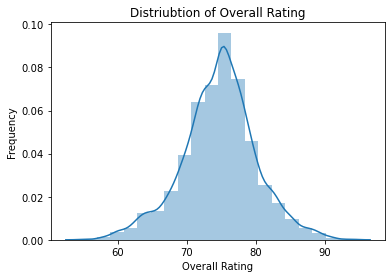

In [18]:
sns.distplot(a=data.overall, bins=20)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distriubtion of Overall Rating')
plt.show()

'overall' looks roughly normally distributed around a mean of 75. Maybe slighlty left skewed?

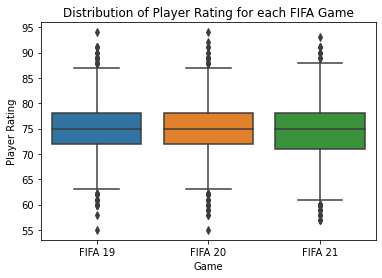

In [19]:
sns.boxplot(x='Game', y='overall', data=data)
plt.title('Distribution of Player Rating for each FIFA Game')
plt.ylabel('Player Rating')
plt.show()

Looking at the plot above, it looks like FIFA 19 and FIFA 20 have similar distributions for 'overall,' while FIFA 21 has slighlty more lower rated players.

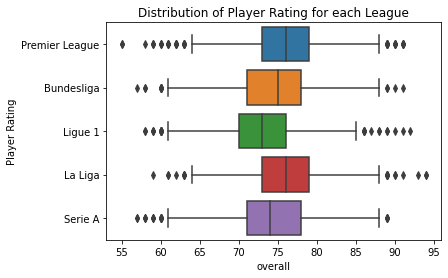

In [20]:
sns.boxplot(x='overall', y='Comp', data=data)
plt.title('Distribution of Player Rating for each League')
plt.ylabel('Player Rating')
plt.show()

The plot above shows how overall player rating is distriubted across the 5 leageus present in the data. It looks like the Premier League (England) and La Liga (Spain) have slighltly higher mean ratings than the other 3 leagues, with Ligue 1 (France) having the lowest. This makes sense as some of the highest rated players in the games, Messi, Ronaldo, Eden Hazard and Kevin De Bruyne play in Spain or England. 

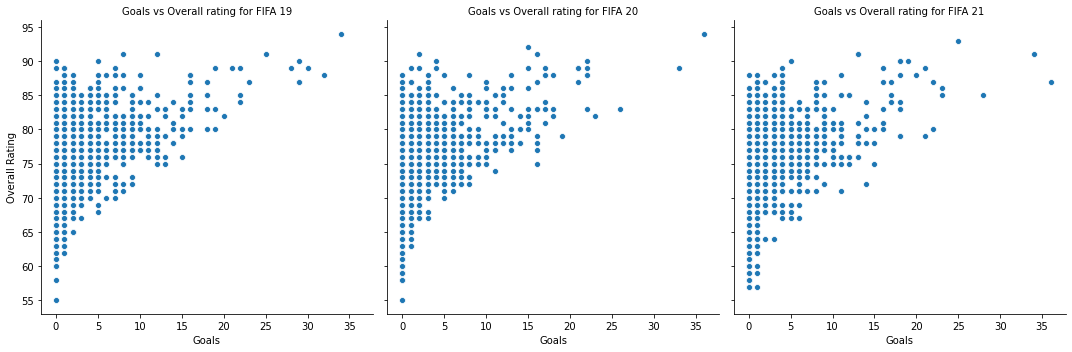

In [21]:
g = sns.relplot(x='Gls', y='overall', data=data, kind='scatter', col='Game')
g.set_axis_labels('Goals', 'Overall Rating')
g.set_titles('Goals vs Overall rating for {col_name}')
plt.show()

Looking at the plots above, you can see that players who score many goals tend to have higher ratings, which makes sense, as the best forwards/midfielders tend to score often. However, goal scoring is likely less important for defensive players, which is why there is large spread of ratings for players with very few goals.

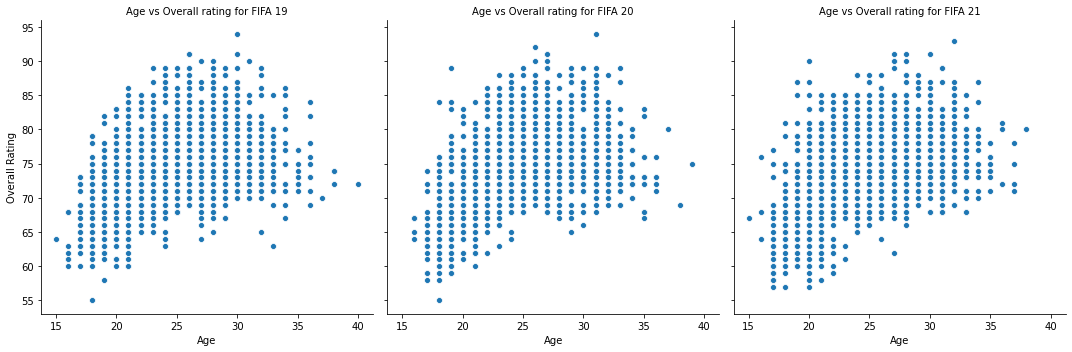

In [22]:
g = sns.relplot(x='Age', y='overall', data=data, kind='scatter', col='Game')
g.set_axis_labels('Age', 'Overall Rating')
g.set_titles('Age vs Overall rating for {col_name}')
plt.show()

Looking at the plots above it is difficult to see if there a relationship between 'Age' and 'overall'. There is possibly a second order linear relationship, with 'overall' increasing until 'Age' is in late 20s/early 30s and then decreasing after. This makes sense, as most players tend to peak during these ages. 

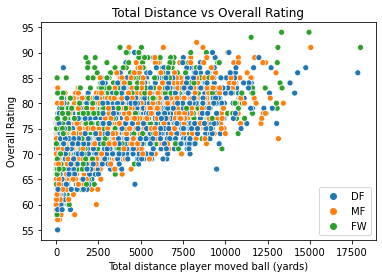

In [23]:
sns.scatterplot(x='Cr_TotDist', y='overall', data=data, hue=data.Pos.tolist())
plt.xlabel('Total distance player moved ball (yards)')
plt.ylabel('Overall Rating')
plt.title('Total Distance vs Overall Rating')
plt.show()

The plot above shows how many yards a player moved while controlling the ball versus overall rating. The best players tend to have the ball often, which you can see in this plot which appears to have a weak linear relationship. The points are shaded by 'Pos' (position), which shows that there is not much of a difference for which positions have the ball in their control more often.

In [24]:
import numpy as np

In [25]:
pd.crosstab(data.Comp, data.Game)

Game,FIFA 19,FIFA 20,FIFA 21
Comp,,,
Bundesliga,353,355,370
La Liga,300,261,291
Ligue 1,365,351,361
Premier League,387,385,388
Serie A,366,341,365


The cross tab above shows the counts for each league per game. The amount of players from each league in the data doesn't change much across the different games.

In [26]:
pd.crosstab(data.Pos, data.Game)

Game,FIFA 19,FIFA 20,FIFA 21
Pos,,,
DF,689,644,722
FW,467,492,438
MF,615,557,615


The cross tab above shows the counts for each position per game. The amount of each position in the data does not change much across the different games. 

Now that we have taken a look at the data, let's run some models. The code below saves the edited data (removed unnecessary columns)

In [27]:
data.to_csv('data17-20.csv', index=False)